In [1]:
%pylab inline
import numpy as np

import pymech.neksuite as nek
from scipy.interpolate import griddata
import os
from tqdm import tqdm
from matplotlib.colors import LogNorm, SymLogNorm

import sys; sys.path.append('../../Nek5000_run_files')
from IO import *

POD_prefix = 'close'

Populating the interactive namespace from numpy and matplotlib


In [2]:
def interp(field, Cx, Cy, XX, YY, method='linear', mask=None):
    """
    field - 1D array of cell values
    Cx, Cy - cell x-y values
    X, Y - meshgrid x-y values
    """
    ngrid = len(XX.flatten())
    grid_field = np.squeeze(np.reshape(griddata((Cx, Cy), field, (XX, YY), method=method), (ngrid, 1)))
    grid_field = grid_field.reshape(XX.shape)
    
    if mask is not None:
        for m in mask: grid_field[m[1],m[0]] = 0
        
    return grid_field

In [3]:
# Load 
Cx = np.load('../../Re_17500/Cx.npy')
Cy = np.load('../../Re_17500/Cy.npy')
mass = np.load('../../Re_17500/mass.npy')
n = mass.size

In [4]:
nx = 400
ny = 200

# Grid for full domain
xmin = np.min(Cx)
xmax = np.max(Cx)
ymin = np.min(Cy)
ymax = np.max(Cy)
x = np.linspace(xmin,xmax,nx)
y = np.linspace(ymin,ymax,ny)
XX, YY = np.meshgrid(x, y)

wing_boundary_x, wing_boundary_y = get_wing_boundary(alpha=5, n_points=200)

In [5]:
POD_path = '../POD_files/'
Phi = np.load(POD_path+POD_prefix+'_Phi.npy')
Sigma = np.load(POD_path+POD_prefix+'_Sigma.npy')
Psi = np.load(POD_path+POD_prefix+'_Psi.npy')
mean_flow = np.load(POD_path+'mean_flow.npy')
time = np.load(POD_path+'t_POD.npy')

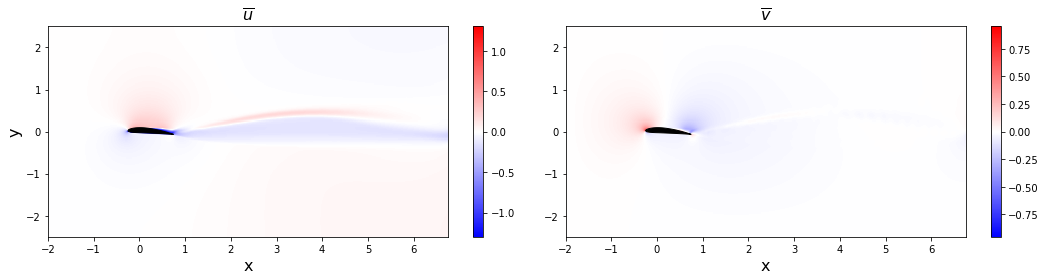

In [6]:
figure(figsize = (15,4))
label_fs = 16

mean_U_grid = interp(mean_flow[:n], Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
mean_V_grid = interp(mean_flow[n:], Cx, Cy, XX, YY, method='linear').reshape(ny,nx)

subplot(1,2,1)
max_abs = np.max(np.abs(mean_U_grid-1))
pcolor(XX,YY,mean_U_grid-1, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
xlim([np.min(x),np.max(x)])
ylim([np.min(y),np.max(y)])
colorbar()
fill(wing_boundary_x, wing_boundary_y, c='k')
title(r'$\overline{u}$', fontsize = label_fs)
xlabel('x', fontsize = label_fs)
ylabel('y', fontsize = label_fs)

subplot(1,2,2)
max_abs = np.max(np.abs(mean_V_grid))
pcolor(XX,YY,mean_V_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
xlim([np.min(x),np.max(x)])
ylim([np.min(y),np.max(y)])
colorbar()
fill(wing_boundary_x, wing_boundary_y, c='k')
title(r'$\overline{v}$', fontsize = label_fs)
xlabel('x', fontsize = label_fs)

tight_layout()

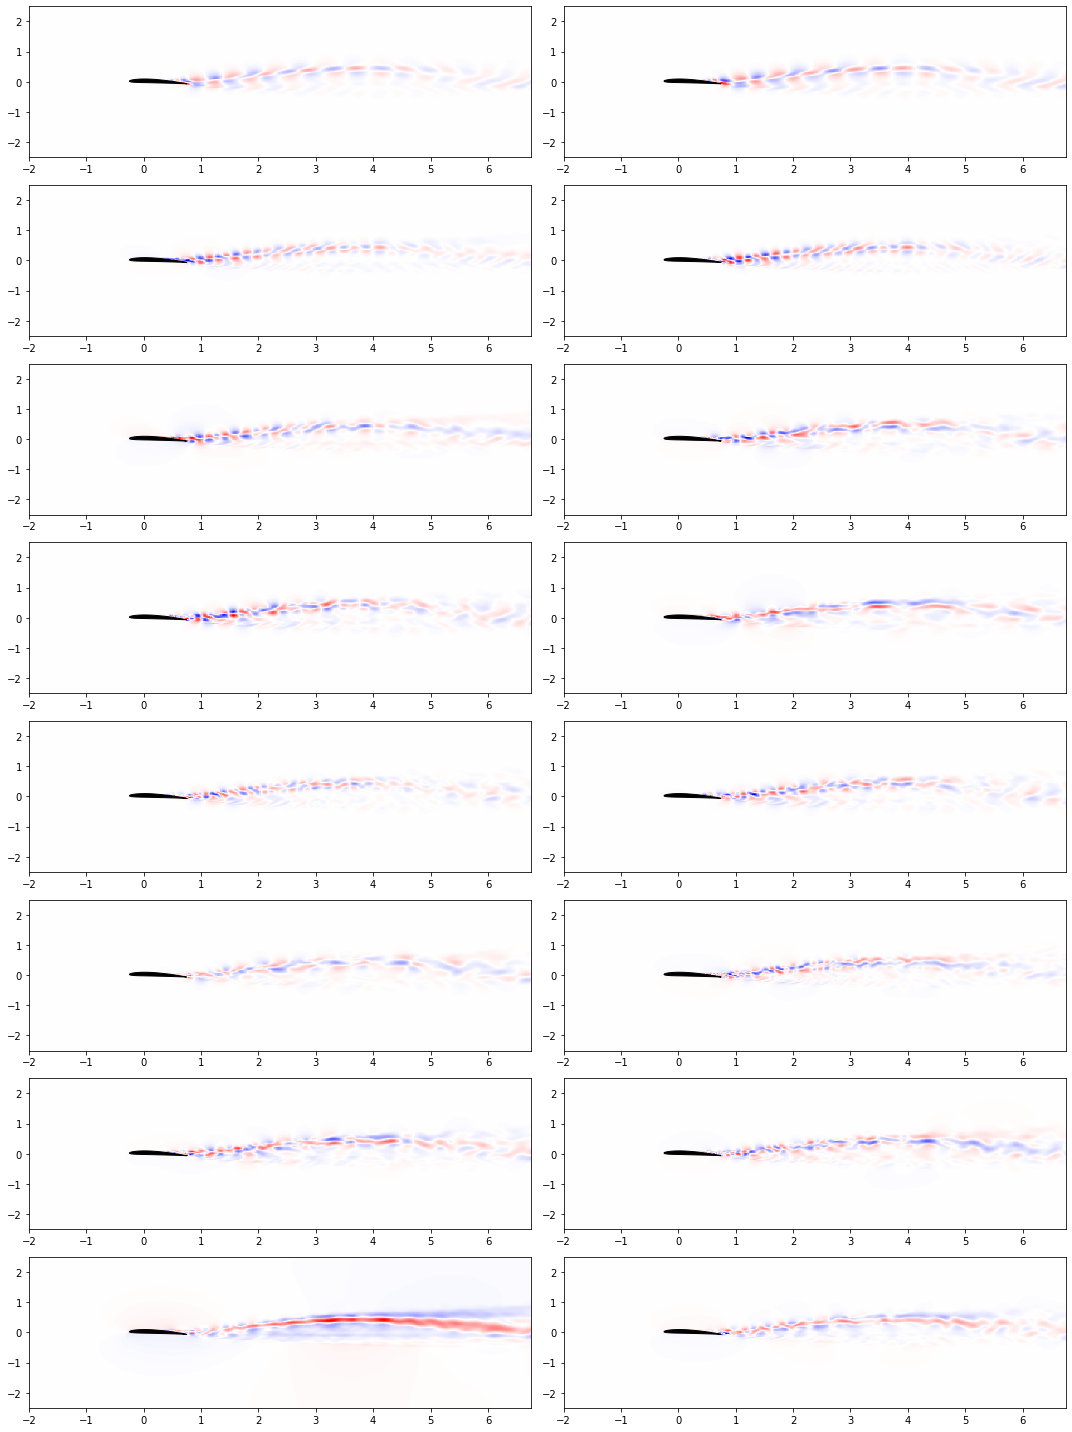

In [7]:
n_figs = 16

n_rows = int(ceil(n_figs/2))
figure(figsize = (15,2.5*n_rows))

PhiU_grid = [interp(Phi[:n,j], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_figs)]

for j in range(n_figs):
    
    subplot(n_rows,2,j+1)
    max_abs = np.max(np.abs(PhiU_grid[j]))
    pcolor(XX,YY,PhiU_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
        
tight_layout()

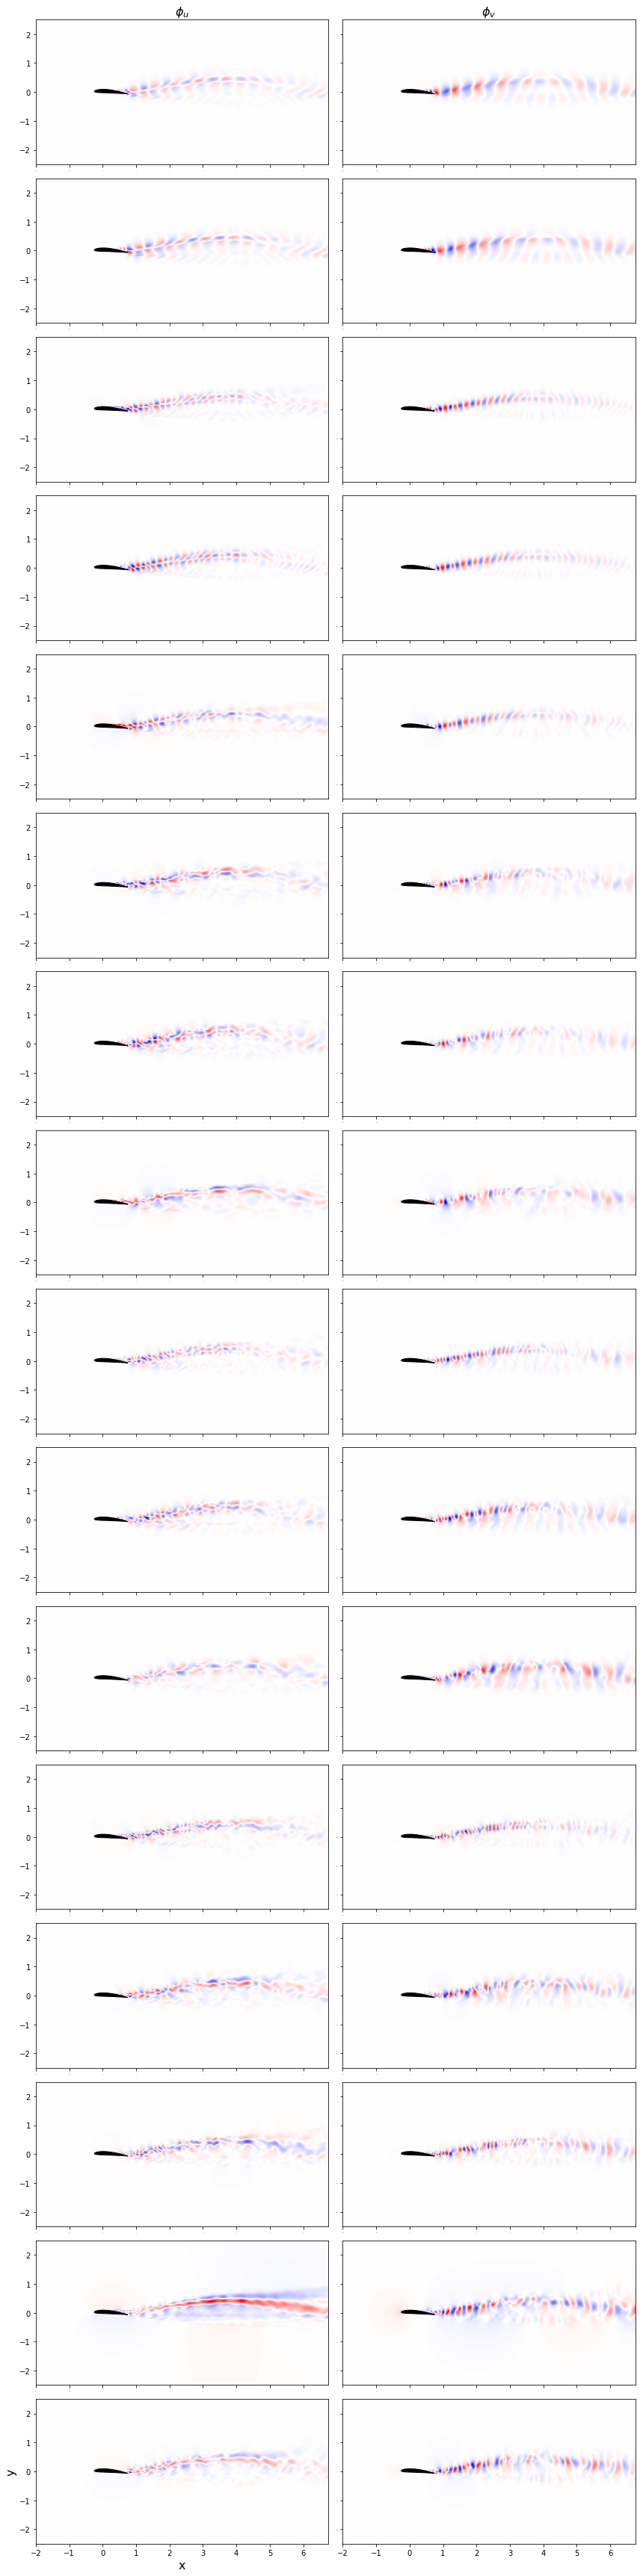

In [8]:
n_rows = 16
figure(figsize = (12,3*n_rows))

PhiU_grid = [interp(Phi[:n,j], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_rows)]
PhiV_grid = [interp(Phi[n:,j], Cx, Cy, XX, YY, method='linear').reshape(ny,nx) for j in range(n_rows)]

for j in range(n_rows):
    
    subplot(n_rows,2,2*j+1)
    max_abs = np.max(np.abs(PhiU_grid[j]))
    pcolor(XX,YY,PhiU_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    
    if j == 0: title(r'$\phi_u$', fontsize = label_fs)
    if j == n_rows-1: 
        xlabel('x', fontsize = label_fs)
        ylabel('y', fontsize = label_fs)
    else: xticks(fontsize = 0)
    
    subplot(n_rows,2,2*j+2)
    max_abs = np.max(np.abs(PhiV_grid[j]))
    pcolor(XX,YY,PhiV_grid[j], cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    yticks(fontsize = 0)
    
    if j == 0: title(r'$\phi_v$', fontsize = label_fs)
    if j != n_rows-1: xticks(fontsize = 0)
        
tight_layout()

[0.14182739 0.27667029 0.32843673 0.37380552 0.4163583  0.43980548
 0.46147824 0.48199597 0.50236304 0.52097359 0.53670746 0.54944478
 0.56189096 0.57390551 0.58455252 0.5944806  0.60391948 0.61277091
 0.62111709 0.62940862 0.6372004  0.64453707 0.65161299 0.65836734
 0.66483329 0.67073131 0.67640453 0.68187279 0.68726534 0.69254147
 0.69742907 0.70193362 0.7063026  0.71051471 0.71468098 0.71874873
 0.72271671 0.7266151  0.73024327 0.73372957 0.73703534 0.74027584
 0.74342663 0.74648217 0.74949156 0.7523761  0.75518652 0.75793884
 0.76063556 0.76323436 0.76580737 0.7682715  0.77068908 0.77306359
 0.775372   0.77763515 0.77985901 0.78204038 0.78417762 0.78627282
 0.78832944 0.79033647 0.79229175 0.79417662 0.79603827 0.79787419
 0.79964092 0.8013891  0.8031018  0.80479096 0.80644128 0.80808145
 0.80969058 0.81128134 0.81283791 0.81437172 0.81588272 0.81735184
 0.81879881 0.82023062 0.8216423  0.82303252 0.82440763 0.82576862
 0.82711557 0.82845131 0.8297511  0.83102442 0.83226527 0.8334

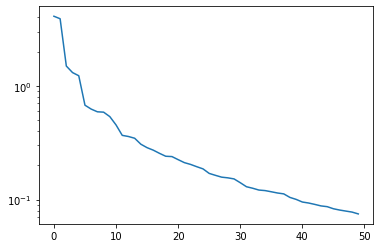

In [9]:
semilogy(Sigma[:50])
print(np.cumsum(Sigma)[:100] / np.sum(Sigma))

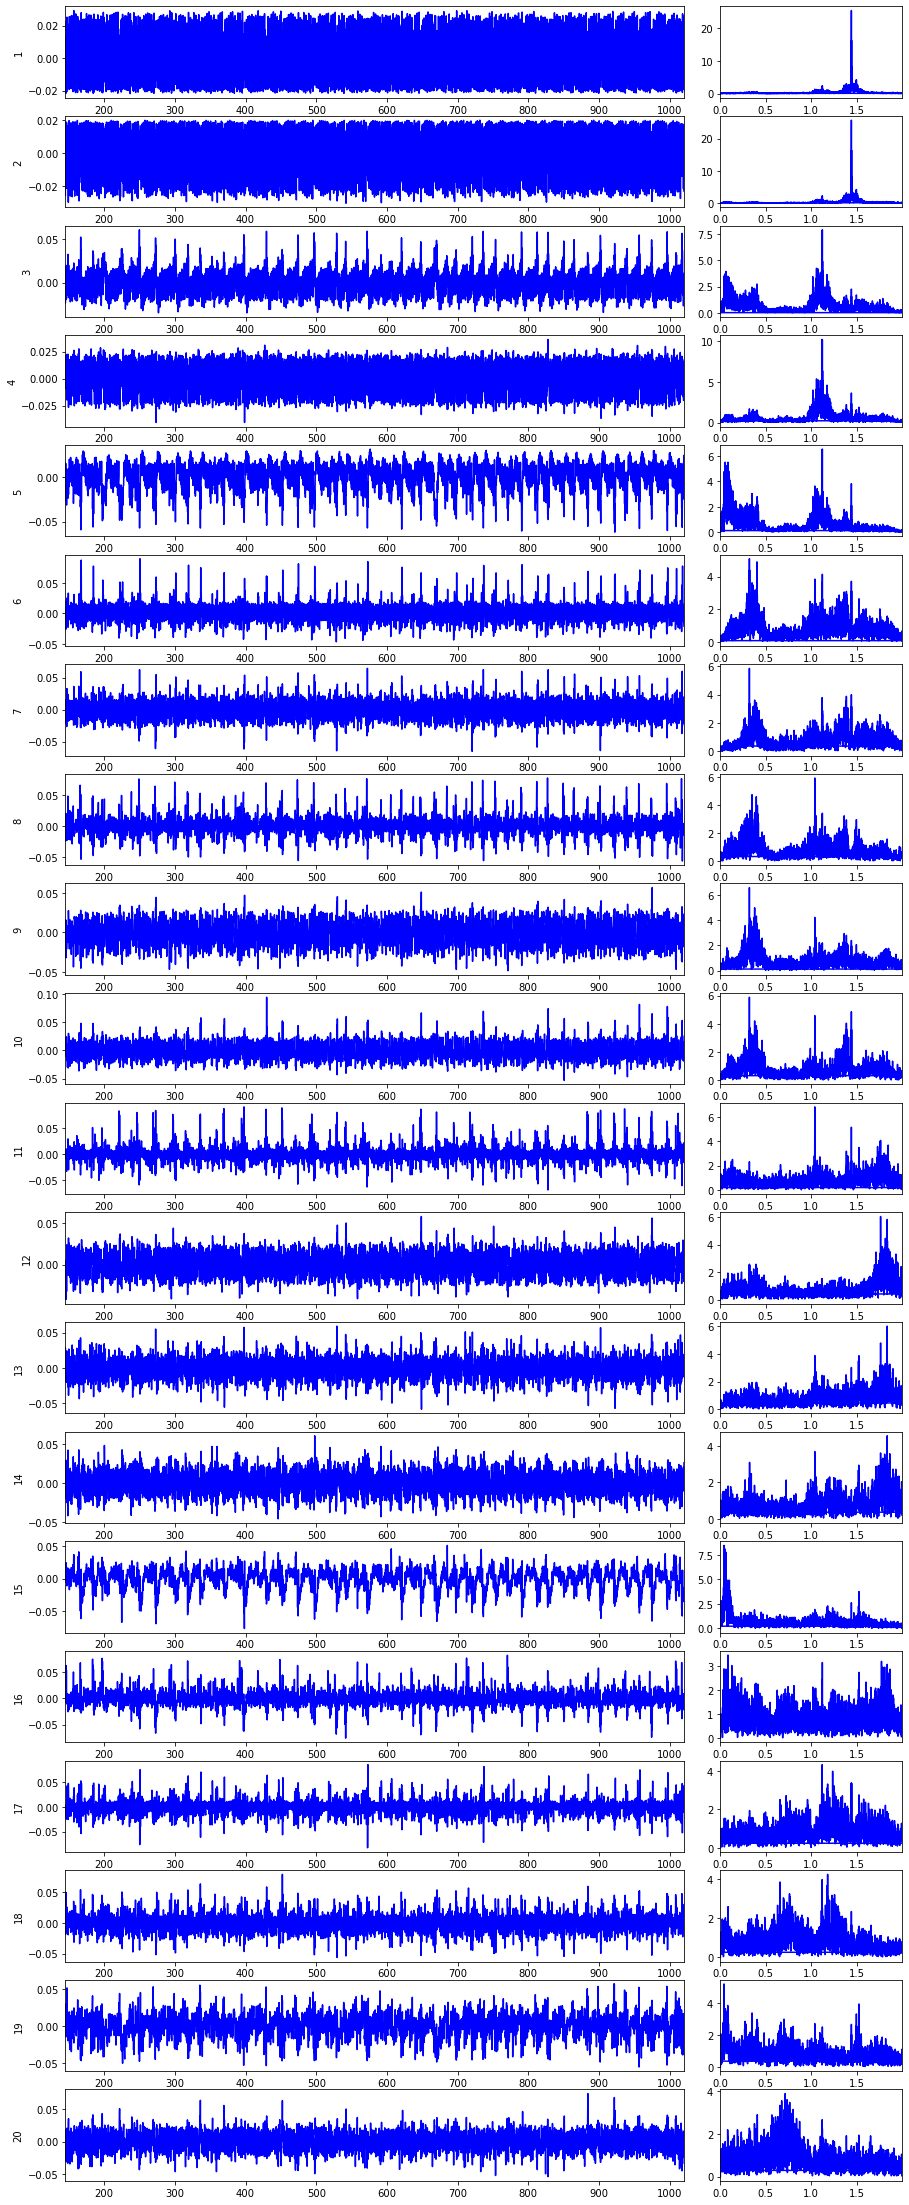

In [10]:
n_rows = 20
figure(figsize = (15,2*n_rows))
m = Psi.shape[0]

for j in range(n_rows):
    
    subplot2grid((n_rows,4),(j,0),rowspan=1, colspan=3)
    plot(time, Psi[:,j], 'b')
    xlim([time[500], time[-1]])
    ylabel(str(j+1))
#     xlim([100,120])
    
    subplot2grid((n_rows,4),(j,3),rowspan=1, colspan=1)
    F_Psi_j = np.fft.fft(Psi[:,j] - np.mean(Psi[:,j]))
    freqs = np.fft.fftfreq(m, d=time[1]-time[0])
    plot(freqs, np.abs(F_Psi_j), 'b')
    xlim([0,np.max(freqs)])

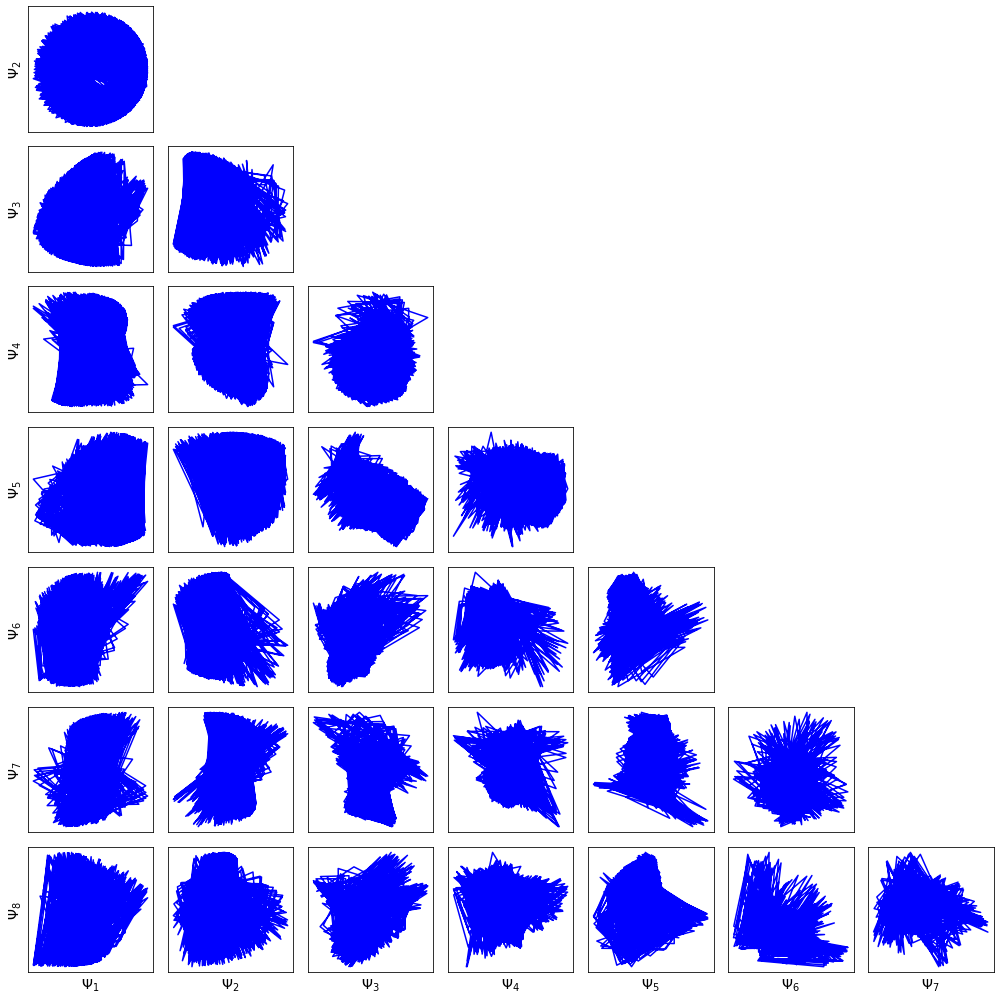

In [11]:
n_rows = 7
subfig_size = 2
label_fs = 14

figure(figsize = (subfig_size*n_rows, subfig_size*n_rows))

for i in range(n_rows+1):
    for j in range(i):
        subplot2grid((n_rows, n_rows), (i-1,j), rowspan=1, colspan=1)
        plot(Psi[:,i], Psi[:,j], 'b')
        xticks([])
        yticks([])
        
        if j == 0: ylabel(r'$\Psi_'+str(i+1)+'$', fontsize = label_fs)
        if i == n_rows: xlabel(r'$\Psi_'+str(j+1)+'$', fontsize = label_fs)

tight_layout()

In [14]:
def get_uv(file_num):
    
    file = '../../Re_17500/outfiles/'+'airfoil0.f{0:05d}'.format(file_num)
    field = nek.readnek(file)
    
    t = field.time
    nel = len(field.elem) # Number of spectral elements
    nGLL = field.elem[0].vel.shape[3] # Order of the spectral mesh
    n = nel*nGLL**2

    u = np.array([field.elem[i].vel[0, 0, j, k]
               for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    v = np.array([field.elem[i].vel[1, 0, j, k]
               for i in range(nel) for j in range(nGLL) for k in range(nGLL)])
    
    return u,v

CRITICAL: I/O error (2): No such file or directory


AttributeError: 'int' object has no attribute 'time'

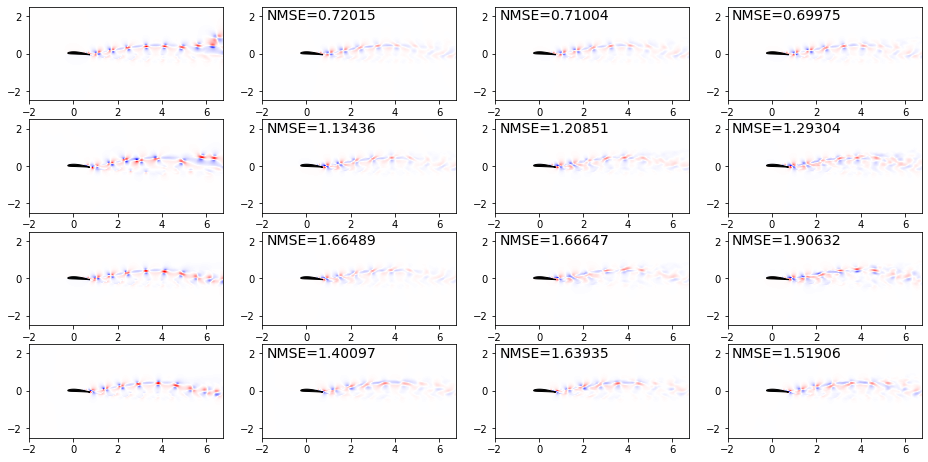

In [15]:
n_rows = 5
time_inds = np.arange(n_rows)*int((len(time)-1)/(n_rows-1))
ranks = [10,25,100]
n_cols = len(ranks)+1

figure(figsize = (16,2*n_rows))

for j in range(n_rows):
    
    ind = time_inds[j]
    
    # Get full data from nek output file, subtract mean, and interpolate to regular grid
    u_full, v_full = get_uv(ind + 81) # POD skips 80 files for transient
    u_full = u_full - mean_flow[:n,0]
    u_full_grid = interp(u_full, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
    
    # Plot full data
    subplot(n_rows, n_cols, j*n_cols+1)
    max_abs = np.max(np.abs(u_full_grid))
    pcolor(XX,YY,u_full_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
    fill(wing_boundary_x, wing_boundary_y, c='k')
    xlim([np.min(x),np.max(x)])
    ylim([np.min(y),np.max(y)])
    
    # Get reconstructions
    for i in range(len(ranks)):
        
        r = ranks[i]
        
        # Get POD reconstruction
        ur = np.multiply(Phi[:n,:r], Sigma[:r]) @ Psi[ind,:r].reshape(r,1)
        ur_grid = interp(ur, Cx, Cy, XX, YY, method='linear').reshape(ny,nx)
        
        subplot(n_rows, n_cols, j*n_cols+i+2)
        pcolor(XX,YY,ur_grid, cmap = 'bwr', vmin=-max_abs, vmax=max_abs, shading = 'auto')
        fill(wing_boundary_x, wing_boundary_y, c='k')
        xlim([np.min(x),np.max(x)])
        ylim([np.min(y),np.max(y)])
        
        residual = u_full-ur.flatten()
        square_error = np.linalg.norm(np.multiply(u_full-ur.flatten(), np.sqrt(mass)))**2
        normalized_square_error = square_error / np.linalg.norm(np.multiply(u_full, np.sqrt(mass)))**2
        
        text(-1.8,1.8,
             'NMSE='+str(np.round(normalized_square_error,5)), 
             fontsize = 14)